In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn import linear_model

In [2]:
gene_expression_matrix = pd.read_csv("input/data.csv")

In [3]:
gene_expression_matrix.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [4]:
labels = pd.read_csv("input/labels.csv")

In [5]:
labels.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [6]:
Y = labels.iloc[:,1]

In [7]:
X = gene_expression_matrix.iloc[:,1:]

Understanding our data

In [8]:
X.shape


(801, 20531)

UMAP

In [9]:
import umap.umap_ as umap
import seaborn as sns

In [10]:
# Define UMAP
brain_umap = umap.UMAP(random_state=999, n_neighbors=30, min_dist=.25)

# Fit UMAP and extract latent vars 1-2
embedding = pd.DataFrame(brain_umap.fit_transform(X), columns = ['UMAP1','UMAP2'])



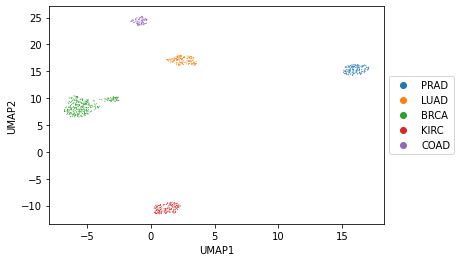

In [11]:
# Produce sns.scatterplot and pass metadata.subclasses as color
sns_plot = sns.scatterplot(x='UMAP1', y='UMAP2', data=embedding,
                hue=Y.to_list(),
                alpha=1, linewidth=0, s=1)
# Adjust legend
sns_plot.legend(loc='center left', bbox_to_anchor=(1, .5))
# Save PNG
sns_plot.figure.savefig('umap_scatter.png', bbox_inches='tight', dpi=500)

Splitting data (+ make sure acceptable label presentation)

<AxesSubplot:>

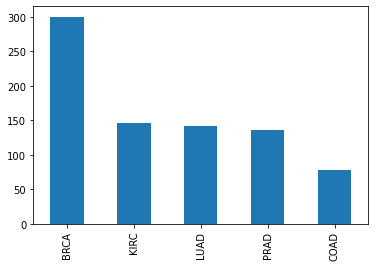

In [12]:
Y.value_counts().plot(kind="bar")

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 10, stratify=Y)

Let's test linear models

<AxesSubplot:>

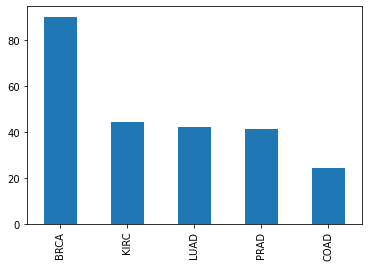

In [14]:
Y_test.value_counts().plot(kind="bar")

<AxesSubplot:>

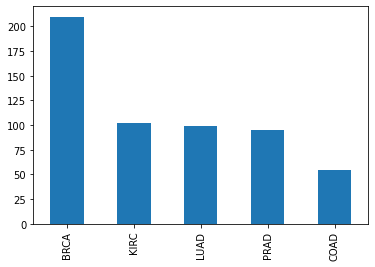

In [15]:
Y_train.value_counts().plot(kind="bar")

PCA APPROACH

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=2)
#x_standard = StandardScaler().fit_transform(X)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2',])

In [17]:
finalDf = pd.concat([principalDf, Y], axis = 1)

In [18]:
finalDf

,principal component 1,principal component 2,Class
0,-62.755415,-94.071973,PRAD
1,-2.432896,90.585842,LUAD
2,-71.266853,-8.064608,PRAD
3,-84.770785,-73.244566,PRAD
4,-69.560171,-9.612940,BRCA
...,...,...,...
796,-60.861882,-22.278633,BRCA
797,-14.465433,53.392194,LUAD
798,10.486261,21.570595,COAD
799,-55.063605,-92.394778,PRAD


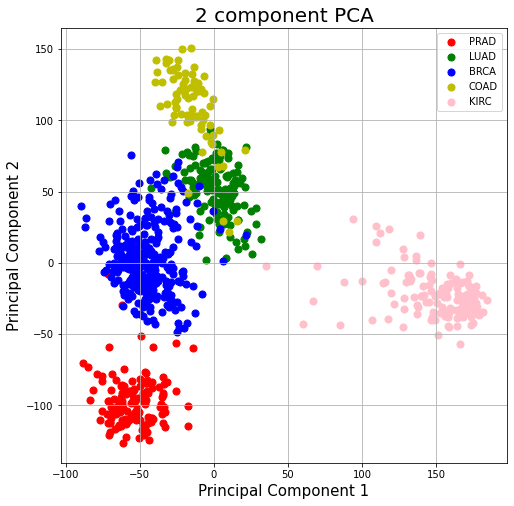

In [19]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['PRAD', 'LUAD', 'BRCA', 'COAD', 'KIRC']
colors = ['r', 'g', 'b','y','pink']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [20]:
pca.explained_variance_ratio_

array([0.1583855, 0.1050396])

In [25]:
X_pca = finalDf.iloc[:,0:2]

In [26]:
X_pca

,principal component 1,principal component 2
0,-62.755415,-94.071973
1,-2.432896,90.585842
2,-71.266853,-8.064608
3,-84.770785,-73.244566
4,-69.560171,-9.612940
...,...,...
796,-60.861882,-22.278633
797,-14.465433,53.392194
798,10.486261,21.570595
799,-55.063605,-92.394778


<AxesSubplot:xlabel='col_0', ylabel='Class'>

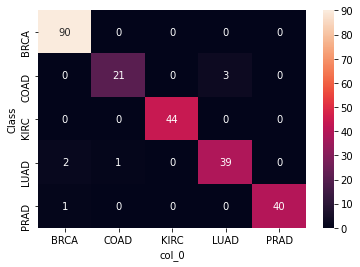

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca,Y, test_size = 0.3, random_state = 10, stratify=Y)
logreg_pca = linear_model.LogisticRegression(max_iter = 2500, C=1000000, random_state=0, multi_class='multinomial')
logreg_pca.fit(X_train, Y_train)
linearmodel_predictions_pca = logreg_pca.predict(X_test)
sns.heatmap(pd.crosstab(Y_test,linearmodel_predictions_pca), annot = True)

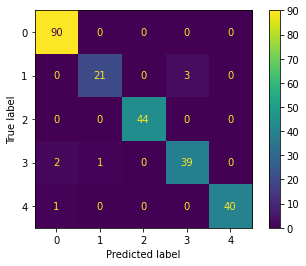

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, linearmodel_predictions_pca)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [31]:
accuracy_score(Y_test, linearmodel_predictions_pca)

0.970954356846473

In [32]:
recall_score(Y_test, linearmodel_predictions_pca, average = "macro")

0.9558362369337979

END OF FIRST APPROACH

Initating second approach (feature selection, chi2...)

In [33]:
from sklearn.feature_selection import chi2, SelectPercentile

In [34]:
X_5_percent = SelectPercentile(chi2, percentile=5).fit_transform(X, Y)
X_5_percent.shape

(801, 1027)

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X_5_percent,Y, test_size = 0.3, random_state = 10, stratify=Y)

In [36]:
logreg = linear_model.LogisticRegression(max_iter = 2500, C=1e40, random_state=0, multi_class='multinomial')

In [37]:
logreg.fit(X_train, Y_train)

LogisticRegression(C=1e+40, max_iter=2500, multi_class='multinomial',
                   random_state=0)

In [38]:
linearmodel_predictions = logreg.predict(X_test)

<AxesSubplot:xlabel='col_0', ylabel='Class'>

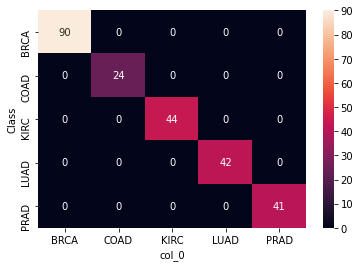

In [75]:
sns.heatmap(pd.crosstab(Y_test,linearmodel_predictions), annot = True)

In [40]:


accuracy_score(Y_test, linearmodel_predictions)

1.0

In [41]:
recall_score(Y_test, linearmodel_predictions, average = "macro")

1.0

In [42]:
f1_score(Y_test, linearmodel_predictions, average = "macro")

1.0

Only using the first 10 genes

In [43]:
X_only_10 = gene_expression_matrix.iloc[:,1:10]

In [44]:
X_train_10, X_test_10, Y_train, Y_test = train_test_split(X_only_10,Y, test_size = 0.3, random_state = 10, stratify=Y)

In [45]:
logreg_only_10 = linear_model.LogisticRegression(max_iter = 2500, multi_class='multinomial')

In [46]:
logreg_only_10.fit(X_train_10,Y_train)

LogisticRegression(max_iter=2500, multi_class='multinomial')

<AxesSubplot:xlabel='col_0', ylabel='Class'>

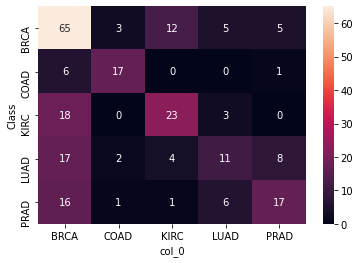

In [76]:
linearmodel_10_predictions = logreg_only_10.predict(X_test_10)
sns.heatmap(pd.crosstab(Y_test,linearmodel_10_predictions), annot = True)

In [48]:
accuracy_score(Y_test, linearmodel_10_predictions)

0.5518672199170125

epoch:  0


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

1
epoch:  1
2
epoch:  2
3
epoch:  3
4

/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr


epoch:  4
5
epoch:  5
6
epoch:  6


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

7
epoch:  7
8
epoch:  8
9
epoch:  9


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

10
epoch:  10
11
epoch:  11


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

12
epoch:  12
13
epoch:  13


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

14
epoch:  14
15
epoch:  15


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

16
epoch:  16
17
epoch:  17


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


18
epoch:  18


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


19
epoch:  19


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


20
epoch:  20


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


21
epoch:  21


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

22
epoch:  22
23
epoch:  23


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

24
epoch:  24
25


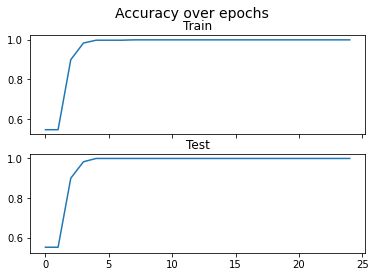

In [49]:
N_TRAIN_SAMPLES = X_train.shape[0]
N_EPOCHS = 25
N_BATCH = 128
N_CLASSES = np.unique(Y_train)

scores_train = []
scores_test = []
mini_batch_index = 0
# EPOCH
epoch = 0
while epoch < N_EPOCHS:
    logreg = linear_model.LogisticRegression(max_iter = epoch, C=500, random_state=0, multi_class='multinomial')
    print('epoch: ', epoch)
    # SHUFFLING
    random_perm = np.random.permutation(X_train.shape[0])
    while True:
        logreg.fit(X_train, Y_train)
        mini_batch_index += N_BATCH

        if mini_batch_index >= N_TRAIN_SAMPLES:
            break

    # SCORE TRAIN
    scores_train.append(accuracy_score(logreg.predict(X_train), Y_train))

    # SCORE TEST
    scores_test.append(accuracy_score(logreg.predict(X_test), Y_test))

    epoch += 1
    print(epoch)
""" Plot """
fig, ax = plt.subplots(2, sharex=True, sharey=True)
ax[0].plot(scores_train)
ax[0].set_title('Train')
ax[1].plot(scores_test)
ax[1].set_title('Test')
fig.suptitle("Accuracy over epochs", fontsize=14)
plt.show()

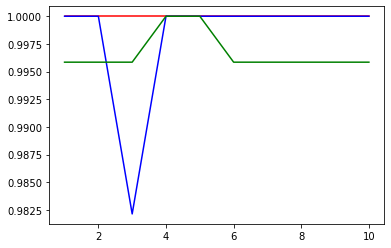

In [77]:
from sklearn.model_selection import KFold
list_t = []
list_training = []
list_testing = []
list_real_testing = []
kf = KFold(n_splits=10)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=10)
i = 1
logreg = linear_model.LogisticRegression(max_iter = 2500)
for train_index, test_index in kf.split(X_train):
    X_train_cross, X_test_cross = X_train.iloc[train_index,], X_train.iloc[test_index,]
    Y_train_cross, Y_test_cross = Y_train.iloc[train_index,], Y_train.iloc[test_index,]

    logreg = logreg.fit(X_train_cross,Y_train_cross)
    training_accuracy = accuracy_score(logreg.predict(X_train_cross),Y_train_cross)
    testing_accuracy = accuracy_score(logreg.predict(X_test_cross),Y_test_cross)
    realtesting_accuracy = accuracy_score(logreg.predict(X_test),Y_test)
    list_real_testing.append(realtesting_accuracy)
    list_t.append(i)
    list_training.append(training_accuracy)
    list_testing.append(testing_accuracy)
    i+=1
plt.plot(np.array(list_t), np.array(list_training), 'r') # plotting t, a separately
plt.plot(list_t, list_testing, 'b') # plotting t, b separately
plt.plot(list_t, list_real_testing, 'g') # plotting t, b separately
plt.show()

In [54]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(Y_train)
y_onehot_test = label_binarizer.transform(Y_test)

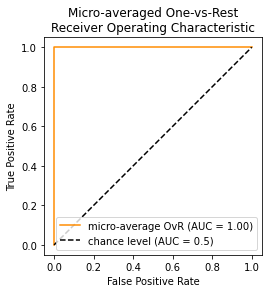

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
y_score = logreg.fit(X_train, Y_train).predict_proba(X_test)
RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

SVM

In [59]:
from sklearn.svm import SVC

In [60]:
svm_model = SVC()

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 10, stratify=Y)

In [62]:
svm_model.fit(X_train, Y_train)

SVC()

In [63]:
Y_svm_prediction = svm_model.predict(X_test)

In [64]:
pd.crosstab(Y_test,Y_svm_prediction)

col_0,BRCA,COAD,KIRC,LUAD,PRAD
Class,,,,,
BRCA,90,0,0,0,0
COAD,0,23,0,1,0
KIRC,0,0,44,0,0
LUAD,0,0,0,42,0
PRAD,0,0,0,0,41


In [65]:
accuracy_score(Y_test,Y_svm_prediction)

0.995850622406639

Naive Bayes Gaussian

In [66]:
from sklearn.naive_bayes import GaussianNB

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 10, stratify=Y)

In [68]:
gaussian_model = GaussianNB()
gaussian_model.fit(X_train, Y_train)
gaussian_prediction = gaussian_model.predict(X_test)

In [69]:
pd.crosstab(Y_test,gaussian_prediction)

col_0,BRCA,COAD,KIRC,LUAD,PRAD
Class,,,,,
BRCA,82,0,3,4,1
COAD,3,12,1,5,3
KIRC,1,0,43,0,0
LUAD,12,0,3,27,0
PRAD,0,0,0,2,39


In [70]:
accuracy_score(Y_test,gaussian_prediction)

0.8423236514522822